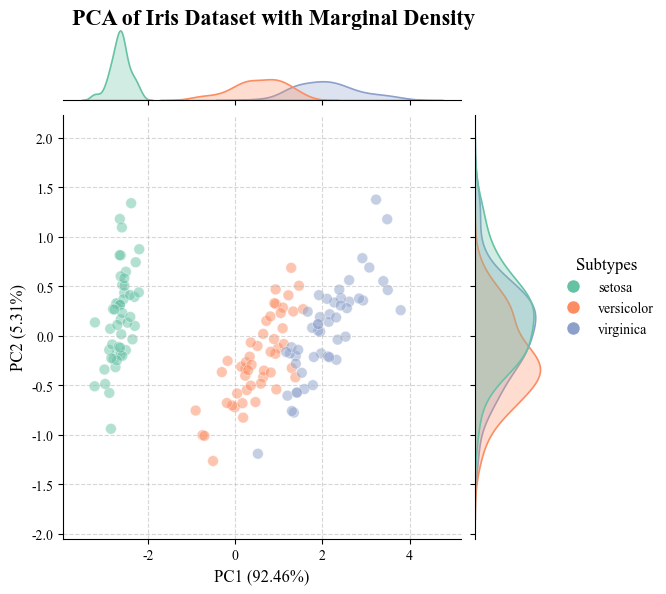

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Step 1: 数据加载与处理
def load_and_prepare_data():
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['target'] = pd.Series(iris.target).map(dict(enumerate(iris.target_names)))
    return df, iris.feature_names

# Step 2: PCA 降维
def perform_pca(data, n_components=2):
    features = data.iloc[:, :-1]
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(features)
    explained_variance = pca.explained_variance_ratio_
    pca_df = pd.DataFrame(
        pca_result, 
        columns=[f"PC1 ({explained_variance[0]*100:.2f}%)", 
                 f"PC2 ({explained_variance[1]*100:.2f}%)"]
    )
    return pca_df, explained_variance

# Step 3: 数据合并
def merge_with_labels(pca_df, labels):
    return pd.concat([pca_df, labels], axis=1)

# Step 4: 绘图

def plot_pca_results(data, explained_variance):
    # 设置柔和调色板
    palette = sns.color_palette("Set2", len(data['target'].unique()))
    
    # 创建 JointGrid 对象
    g = sns.JointGrid(data=data, 
                      x=data.columns[0], 
                      y=data.columns[1], 
                      hue='target', 
                      palette=palette)
    
    # 绘制散点图，禁用默认图例
    g.plot_joint(sns.scatterplot, 
                 s=60, alpha=0.5, edgecolor='w', linewidth=0.5, legend=False)

    # 绘制 X 轴和 Y 轴的边缘密度图，禁用默认图例
    sns.kdeplot(data=data, x=data.columns[0], hue='target', ax=g.ax_marg_x, 
                fill=True, common_norm=False, palette=palette, alpha=0.3, legend=False, linewidth=1.2)
    sns.kdeplot(data=data, y=data.columns[1], hue='target', ax=g.ax_marg_y, 
                fill=True, common_norm=False, palette=palette, alpha=0.3, legend=False, linewidth=1.2)
    
    # 手动添加右侧图例
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[i], markersize=10) 
               for i in range(len(data['target'].unique()))]
    labels = list(data['target'].unique())  # 确保 labels 是一个列表
    g.fig.legend(handles=handles, labels=labels, 
                 loc='center right', fontsize=10, title='Subtypes', title_fontsize=12, frameon=False)

    # 调整图例与图表内容之间的间距
    g.fig.subplots_adjust(top=0.95, right=0.8, left=0)  # 留出足够右侧空间
    
    # 设置标题和轴标签
    g.fig.suptitle('PCA of Iris Dataset with Marginal Density', fontsize=16, fontweight='bold', x=0.35)
    g.ax_joint.set_xlabel(data.columns[0], fontsize=12)
    g.ax_joint.set_ylabel(data.columns[1], fontsize=12)
    g.ax_joint.grid(True, linestyle='--', alpha=0.5)
    
    plt.show()

# 主流程
if __name__ == "__main__":
    df_iris, feature_names = load_and_prepare_data()
    pca_df, explained_variance = perform_pca(df_iris)
    pca_df_with_label = merge_with_labels(pca_df, df_iris['target'])
    plot_pca_results(pca_df_with_label, explained_variance)
